In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comp = pd.read_csv('../input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv')

In [3]:
comp.head()
comp.shape

(1520, 5)

In [4]:
comp['Date'] = pd.to_datetime(comp['Date'],infer_datetime_format=True)
comp.head()

/tmp/ipykernel_34/790653496.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  comp['Date'] = pd.to_datetime(comp['Date'],infer_datetime_format=True)


,Date,AMZN,DPZ,BTC,NFLX
0,2013-05-01,248.229996,51.190983,106.250000,30.415714
1,2013-05-02,252.550003,51.987320,98.099998,30.641428
2,2013-05-03,258.049988,52.446388,112.900002,30.492857
3,2013-05-06,255.720001,53.205257,109.599998,30.098572
4,2013-05-07,257.730011,54.151505,113.199997,29.464285


In [5]:
comp.set_index(comp['Date'],inplace=True)
comp.head()

,Date,AMZN,DPZ,BTC,NFLX
Date,,,,,
2013-05-01,2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,2013-05-07,257.730011,54.151505,113.199997,29.464285


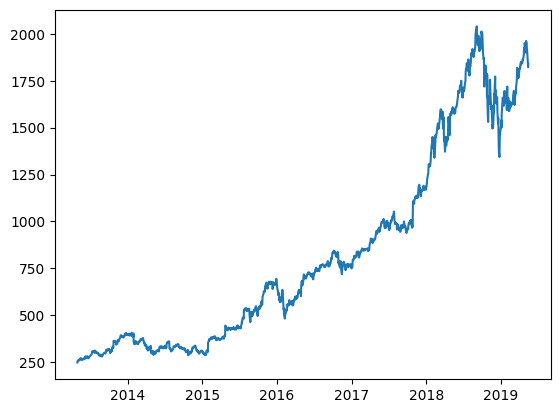

In [6]:
plt.plot(comp['AMZN'])
plt.show()

In [7]:
comp['AMZN(R-M)'] = comp.AMZN.rolling(window=12).mean()
comp['AMZN(S-M)'] = comp.AMZN.rolling(window=12).std()
comp['DPZ(R-M)'] = comp.DPZ.rolling(window=12).mean()
comp['DPZ(S-M)'] = comp.DPZ.rolling(window=12).std()
comp['BTC(R-M)'] = comp.BTC.rolling(window=12).mean()
comp['BTC(S-M)'] = comp.BTC.rolling(window=12).std()
comp['NFLX(R-M)'] = comp.NFLX.rolling(window=12).mean()
comp['NFLX(S-M)'] = comp.NFLX.rolling(window=12).std()

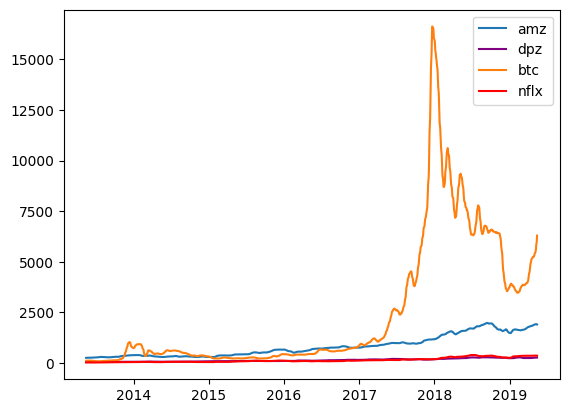

In [17]:
# mean
plt.plot(comp['AMZN(R-M)'],label='amz')
plt.plot(comp['DPZ(R-M)'],label='dpz',color='purple')
plt.plot(comp['BTC(R-M)'],label='btc')
plt.plot(comp['NFLX(R-M)'],label='nflx',color='red')
plt.legend()
plt.show()

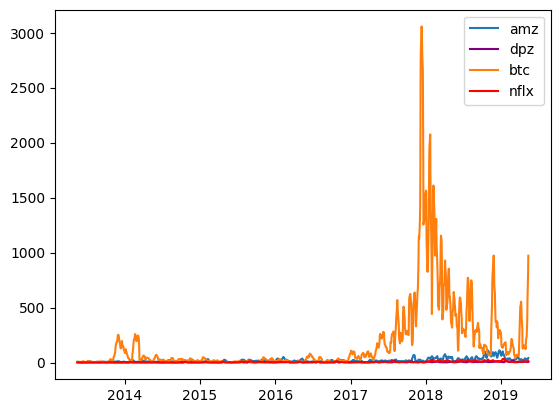

In [18]:
# std
plt.plot(comp['AMZN(S-M)'],label='amz')
plt.plot(comp['DPZ(S-M)'],label='dpz',color='purple')
plt.plot(comp['BTC(S-M)'],label='btc')
plt.plot(comp['NFLX(S-M)'],label='nflx',color='red')
plt.legend()
plt.show()

test statistic < critical value means a  stationary but here the data is not stationary

In [11]:
#dickey_fuller test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(comp['AMZN'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags used','No of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Test Statistic                0.553660
p-value                       0.986416
Lags used                    24.000000
No of observations used    1495.000000
Critical Value (1%)          -3.434732
Critical Value (5%)          -2.863475
Critical Value (10%)         -2.567800
dtype: float64


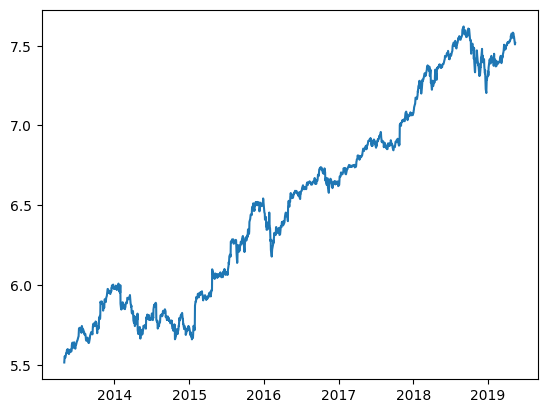

In [20]:
amn_log = np.log(comp['AMZN'])
plt.plot(amn_log)

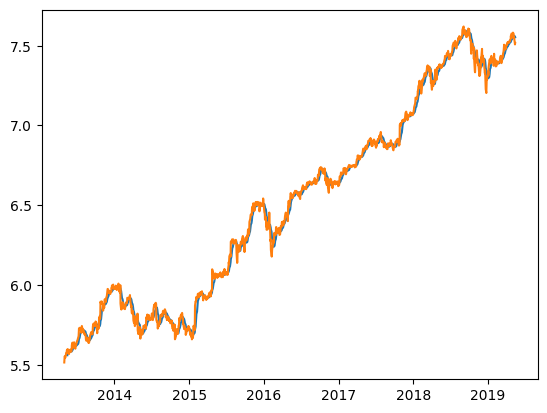

In [22]:
mov_avg = amn_log.rolling(window=12).mean()
mov_std = amn_log.rolling(window=12).std()
plt.plot(mov_avg)
plt.plot(amn_log)
plt.show()

In [37]:
a=amn_log-mov_avg
a.head(12)

Date
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-06         NaN
2013-05-07         NaN
2013-05-08         NaN
2013-05-09         NaN
2013-05-10         NaN
2013-05-13         NaN
2013-05-14         NaN
2013-05-15         NaN
2013-05-16    0.016516
Name: AMZN, dtype: float64

In [38]:
a.dropna(inplace=True)
a.head(10)
a[]

Date
2013-05-16    0.016516
2013-05-17    0.031189
2013-05-20    0.017910
2013-05-21    0.019076
2013-05-22   -0.005440
2013-05-23   -0.011166
2013-05-24   -0.012375
2013-05-28    0.006354
2013-05-29   -0.000851
2013-05-30    0.003305
Name: AMZN, dtype: float64

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    mean1=timeseries.rolling(window=12).mean()
    std1=timeseries.rolling(window=12).std()
    
    #rolling statistics
    original=plt.plot(timeseries, color='green', label='Original')
    mean_1=plt.plot(mean1,color='red',label='Mean')
    std_1=plt.plot(std1, color='brown',label='Standard Deviation')
    plt.legend(loc='best')
    plt.title('Mean and SD')
    plt.show(block=False)
    
    dftest = adfuller(timeseries['AMZN'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','No of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

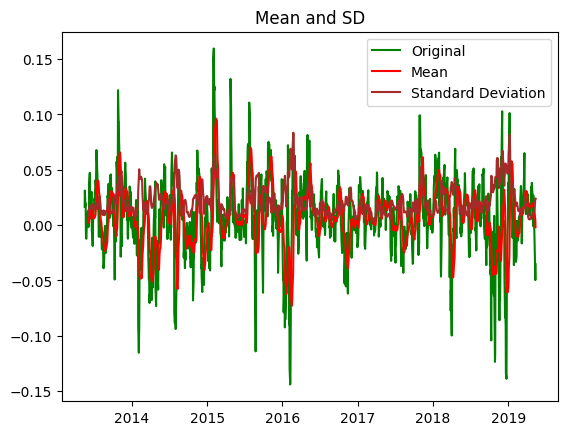

KeyError: 'AMN'

In [30]:
test_stationarity(a)

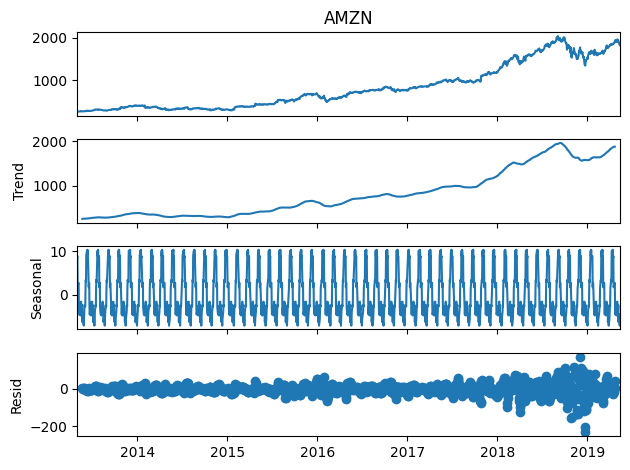

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(comp['AMZN'], model='additive', period=30)  # Assuming a seasonal period of 30
decomposition.plot()
plt.show()

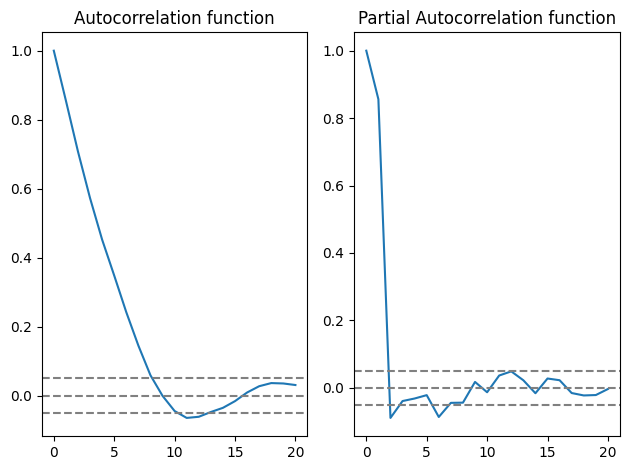

In [40]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(a,nlags=20)
lag_pacf=pacf(a,nlags=20)

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(a)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


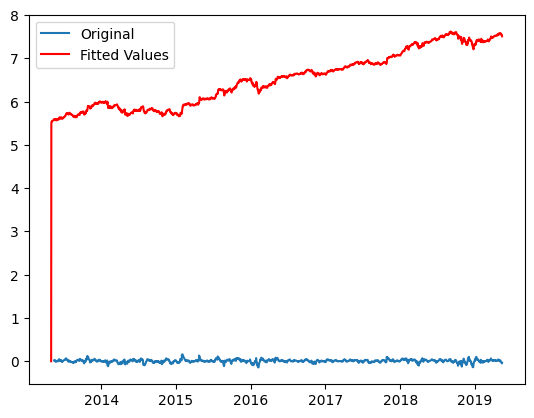

In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(amn_log, order=(10,1,2))
results = model.fit()

# Make predictions
fitted_values = results.fittedvalues

# Plot original data and fitted values
plt.plot(a, label='Original')
plt.plot(fitted_values, color='red', label='Fitted Values')
#plt.title('ARIMA Model Fit RSS: %.4' % sum((results.fittedvalues-df_shifting['AMZN'])**2))
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


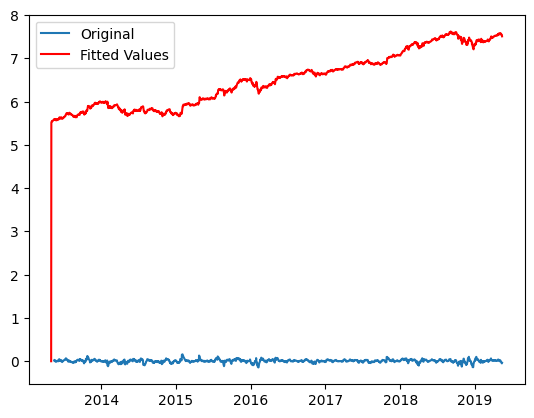

In [44]:
#ma model
model = ARIMA(amn_log, order=(10,1,0))
results = model.fit()

# Make predictions
fitted_values = results.fittedvalues

# Plot original data and fitted values
plt.plot(a, label='Original')
plt.plot(fitted_values, color='red', label='Fitted Values')
#plt.title('ARIMA Model Fit RSS: %.4' % sum((results.fittedvalues-df_shifting['AMZN'])**2))
plt.legend()
plt.show()

In [45]:

prediction_arima_diff=pd.Series(results.fittedvalues,copy=True)
print(prediction_arima_diff.head(5))

Date
2013-05-01    0.000000
2013-05-02    5.514356
2013-05-03    5.531825
2013-05-06    5.552941
2013-05-07    5.542808
dtype: float64


In [46]:
cumsum=prediction_arima_diff.cumsum()
print(cumsum.head(5))

Date
2013-05-01     0.000000
2013-05-02     5.514356
2013-05-03    11.046180
2013-05-06    16.599121
2013-05-07    22.141929
dtype: float64


NameError: name 'log' is not defined

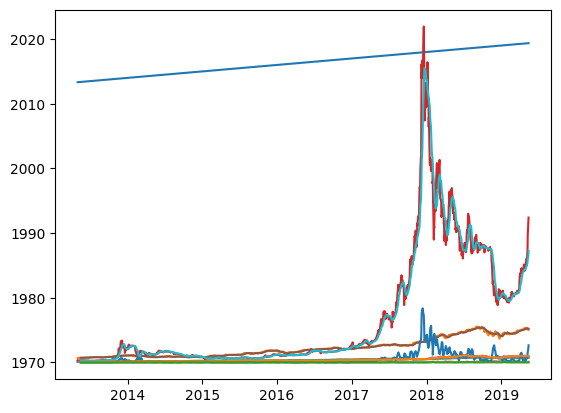

In [51]:
import matplotlib.pyplot as plt

# Assuming df_amzn contains your original data and predictions_arima contains your ARIMA predictions
plt.plot(comp.index, comp, label='Original Data')
plt.plot(comp.index, log, label='ARIMA Predictions')
plt.xlabel('Date')  # Assuming your index represents dates
plt.ylabel('Value')  # Update with appropriate label
plt.title('Original Data vs ARIMA Predictions')
plt.legend()
plt.show()

In [55]:
amn_log

Date
2013-05-01    5.514356
2013-05-02    5.531609
2013-05-03    5.553153
2013-05-06    5.544083
2013-05-07    5.551913
                ...   
2019-05-08    7.558918
2019-05-09    7.549541
2019-05-10    7.544322
2019-05-13    7.508063
2019-05-14    7.517586
Name: AMZN, Length: 1520, dtype: float64

In [56]:
# Forecast future values
forecast_values = results.forecast(steps=120)
forecast_values

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1520    7.517825
1521    7.519085
1522    7.519685
1523    7.517432
1524    7.517873
          ...   
1635    7.518326
1636    7.518326
1637    7.518326
1638    7.518326
1639    7.518326
Name: predicted_mean, Length: 120, dtype: float64